In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=1)

In [228]:
boston.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [229]:
# lets check the description of the dataset
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [230]:
print(boston.data)

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [231]:
boston.target

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [232]:
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03


In [233]:
dataset['Price'] = boston.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [234]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Price    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [235]:
categorical_cols = dataset.select_dtypes(include=['category']).columns
categorical_cols

Index(['CHAS', 'RAD'], dtype='object')

In [236]:
dataset[categorical_cols] = dataset[categorical_cols].astype(float)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [237]:
# sumrise the stats of data
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [238]:
# check the missing values
dataset.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [239]:
# Exploratory Data Analysis
# Correlation
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0, 0.5, 'price')

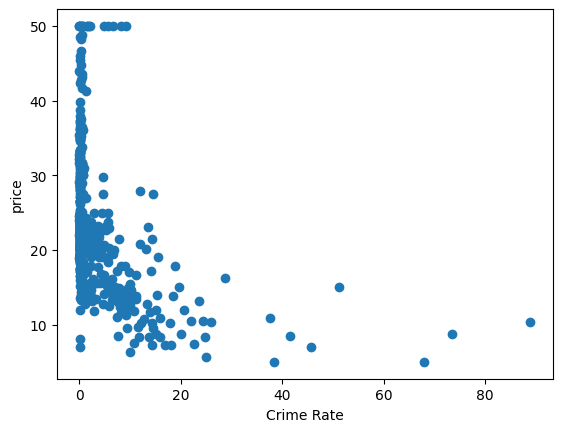

In [240]:
plt.scatter(dataset['CRIM'], dataset['Price'])
plt.xlabel("Crime Rate")
plt.ylabel("price")

Text(0, 0.5, 'price')

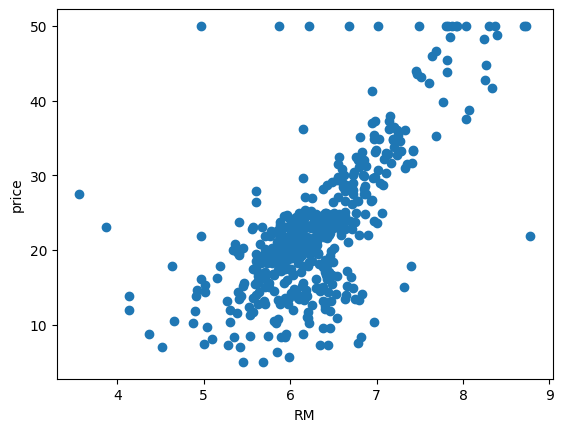

In [241]:
plt.scatter(dataset['RM'], dataset['Price'])
plt.xlabel("RM")
plt.ylabel("price")

<Axes: xlabel='RM', ylabel='Price'>

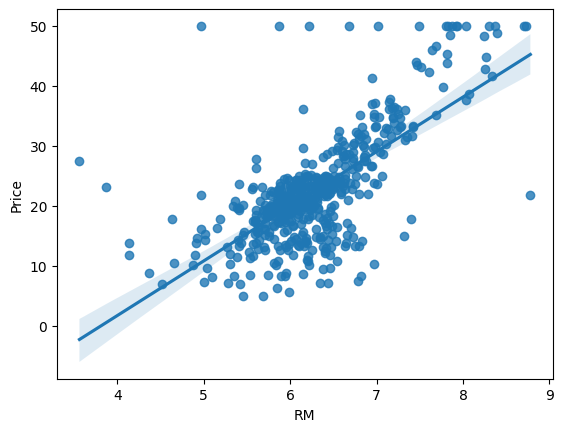

In [242]:
sns.regplot(x="RM", y="Price", data=dataset)

<Axes: xlabel='LSTAT', ylabel='Price'>

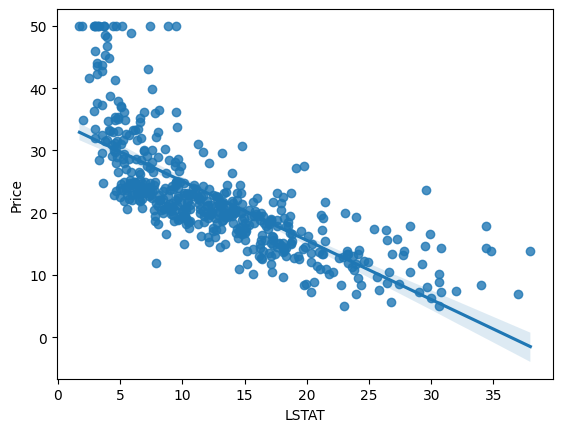

In [243]:
sns.regplot(x="LSTAT", y="Price", data=dataset)

<Axes: xlabel='CHAS', ylabel='Price'>

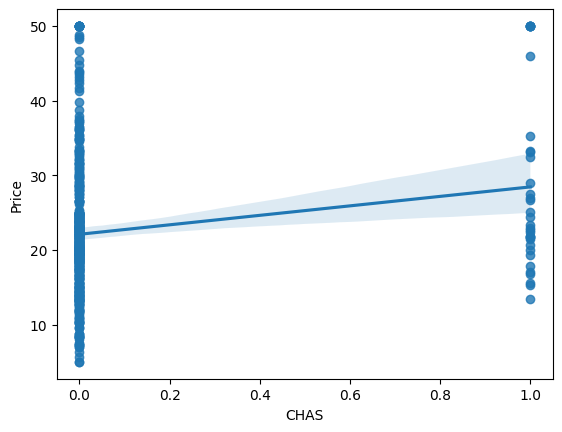

In [244]:
sns.regplot(x="CHAS", y="Price", data=dataset)

<Axes: xlabel='PTRATIO', ylabel='Price'>

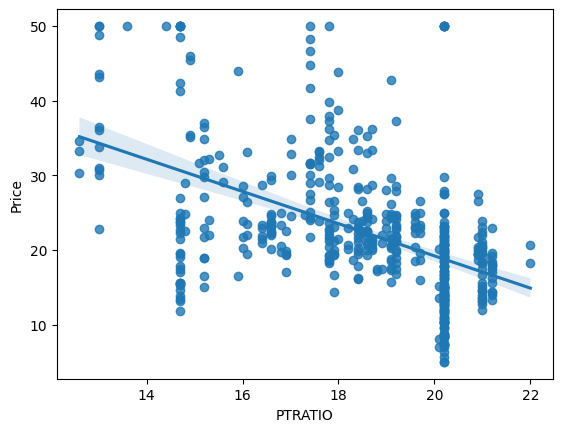

In [245]:
sns.regplot(x="PTRATIO", y="Price", data=dataset)

In [246]:
# #dividding data into independent and dependant feature
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [247]:
# train test split
from sklearn.model_selection import train_test_split

In [248]:
X_train, X_test, y_train, y_test = train_test_split( x,y, test_size=0.33, random_state=42)

In [249]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
26,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35
108,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [250]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
265,0.76162,20.0,3.97,0.0,0.647,5.560,62.8,1.9865,5.0,264.0,13.0,392.40,10.45
29,1.00245,0.0,8.14,0.0,0.538,6.674,87.3,4.2390,4.0,307.0,21.0,380.23,11.98


In [251]:
# standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [252]:
X_train = scaler.fit_transform(X_train)

In [253]:
X_test = scaler.transform(X_test)

In [254]:
X_train

array([[ 0.89624872, -0.51060139,  0.98278223, ...,  0.86442095,
         0.24040357,  0.77155612],
       [-0.34895881, -0.51060139, -0.44867555, ...,  1.22118698,
         0.20852839,  0.32248963],
       [-0.41764058,  0.03413008, -0.48748013, ..., -1.36536677,
         0.43481957,  0.92775316],
       ...,
       [-0.43451148,  2.97567999, -1.32968321, ..., -0.56264319,
         0.36745216, -0.90756208],
       [ 1.01703049, -0.51060139,  0.98278223, ...,  0.86442095,
        -2.80977992,  1.50233514],
       [-0.40667333, -0.51060139, -0.38831288, ...,  1.17659123,
        -3.25117205, -0.26046005]])

In [255]:
X_test

array([[-0.42451319, -0.51060139, -1.03649306, ..., -0.74102621,
         0.41899501, -0.48220406],
       [-0.42911576,  1.2325393 , -0.6973123 , ..., -0.29506866,
         0.43481957, -1.25063772],
       [-0.42269508, -0.51060139,  2.36824941, ...,  0.8198252 ,
         0.35807046,  0.77713459],
       ...,
       [-0.33727525,  0.36096896, -1.04799071, ..., -2.34647337,
         0.38395492, -0.28556314],
       [-0.30591027, -0.51060139, -0.44867555, ...,  1.22118698,
         0.2463943 , -0.07218683],
       [-0.36872487,  0.36096896, -1.04799071, ..., -2.34647337,
         0.32133488, -0.91871901]])

# **Model Training**

In [256]:
from sklearn.linear_model import LinearRegression

In [257]:
regeration = LinearRegression()

In [258]:
regeration.fit(X_train, y_train)

LinearRegression()

In [259]:
# print the cofficients and intercepts
print(regeration.coef_)

[-0.98858032  0.86793276  0.40502822  0.86183791 -1.90009974  2.80813518
 -0.35866856 -3.04553498  2.03276074 -1.36400909 -2.0825356   1.04125684
 -3.92628626]


In [260]:
print(regeration.intercept_)

22.970796460176988


In [261]:
regeration.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [262]:
# Prediction with test data
reg_pred = regeration.predict(X_test)

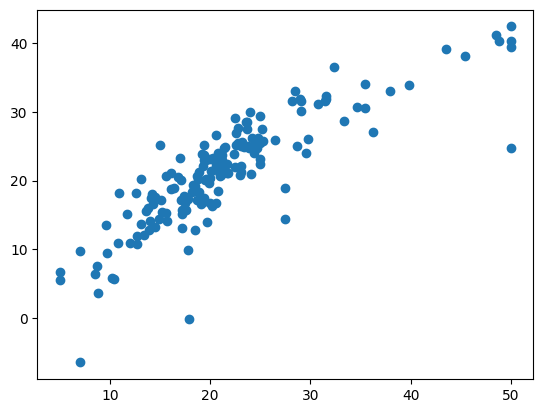

In [263]:
# plot the sactter plot for the prediction
plt.scatter(y_test, reg_pred)

In [264]:
#Residuals
residuals = y_test - reg_pred
residuals

,Price
173,-4.934695
274,-4.218701
491,-2.037511
72,-2.701450
452,-2.609673
...,...
110,0.642557
321,-1.917346
265,-4.854619
29,0.297942


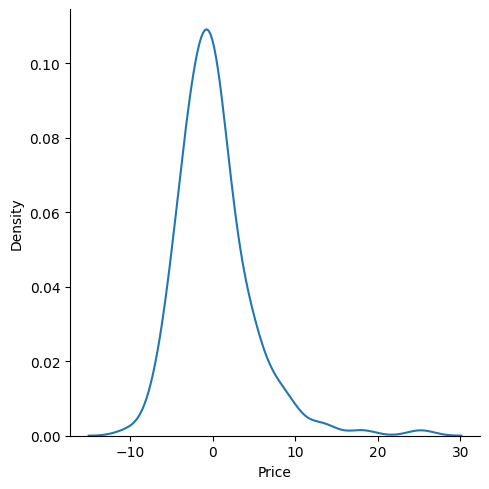

In [265]:
## prediction with residuals/errors
sns.displot(residuals, kind="kde")

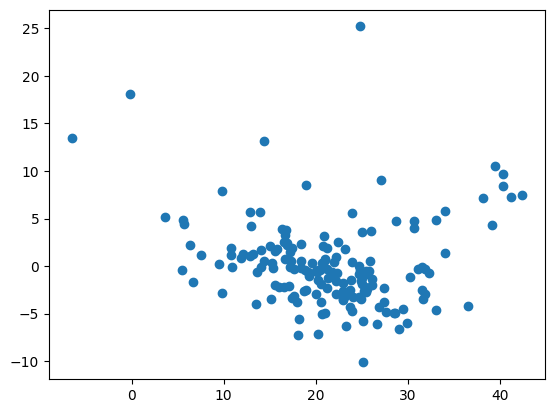

In [266]:
##scatter plot prediction with residuals/errors
# uniform destributatio
plt.scatter(reg_pred, residuals)

In [267]:
#performance metrices
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [268]:
print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

20.724023437339746
3.148255754816832
4.552364598463061


# **R Square and Adjusted R Square**
Adjusted R-squared value is calculated using the formula: 1 - (1 - R-squared) * ((n - 1)/(n - p - 1)).

In [269]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)

In [270]:
score

0.7261570836552478

In [271]:
1- ((1-score)*(len(y_test)-1))/(len(y_test) - X_test.shape[1] -1)

0.7028893848808571

# **New data Prediction**

In [272]:
#reshape this data to convert it into two dimention data
boston.data.to_numpy()[0].reshape(1,-1)


array([[0.00632, 18.0, 2.31, '0', 0.538, 6.575, 65.2, 4.09, '1', 296.0,
        15.3, 396.9, 4.98]], dtype=object)

In [273]:
scaler.transform(boston.data.to_numpy()[0].reshape(1,-1))

array([[-0.43564324,  0.27381192, -1.28656701, -0.28821362, -0.16592705,
         0.34415812, -0.13400517,  0.15295316, -0.98016846, -0.68122373,
        -1.32077101,  0.43481957, -1.04841834]])

In [275]:
regeration.predict(scaler.transform(boston.data.to_numpy()[0].reshape(1,-1)))

array([29.99003492])

# **Pickling the Model File For Deployment**

In [276]:
import pickle

In [279]:
pickle.dump(regeration, open("regmodel.pkl", "wb"))

In [280]:
pickle_model = pickle.load(open("regmodel.pkl", "rb"))

In [281]:
pickle_model.predict(scaler.transform(boston.data.to_numpy()[0].reshape(1,-1)))

array([29.99003492])